#Background:
### I found these datasets on kaggle. They contains data from GoldenCheetah - a web application that gives athletes the ability to download their power data to the computer of their choice, analyze it in whatever way they see fit, and share their methods of analysis with others. The question I am answering is, 'What sport requires the most critical power exertion among 20-30 women in a sample.' For background, critical power refers to continuous constant power output exercise. 

##Clean Data

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('activities_mmp.csv')

In [3]:
df1 = pd.read_csv('activities.csv')

In [4]:
df2 = pd.read_csv('athletes.csv')

##Set Index for 'id'

In [5]:
df = df.set_index('id')

In [6]:
df1 = df1.set_index('id')

In [7]:
df2 = df2.set_index('id')

##Combine CSV's

In [8]:
df3 = pd.concat([df1, df2])

In [19]:
df4 = pd.concat([df3,df])

##Get rid of unnecessary columnns

In [20]:
df4 = df4[['date','age','gender','sport','data','1s_critical_power','15s_critical_power','2m_critical_power','3m_critical_power']]

##Get rid of rows that have NaN data

In [16]:
df4 = df4.dropna()

##Filter to get 20-30 year old female data by sport and critical power

In [21]:
females = df4[df4['gender'] == 'F' ]

In [22]:
females['sport'].value_counts()

Bike                                  16188
Run                                    1635
Rennrad                                 719
Swim                                    502
Row                                     478
                                      ...  
Afternoon Activity bkool                  1
Giretto post jogging mattutino....        1
Camminata mattutina ☔️                    1
Giro mtb                                  1
d                                         1
Name: sport, Length: 233, dtype: int64

In [37]:
rundset = females.query("age<30 and age >20")

##Group by sport and average critcal power

In [25]:
graph1 = rundset.groupby('sport')['15s_critical_power'].mean()

In [31]:
graph2 = rundset.groupby('sport')['2m_critical_power'].mean()

In [33]:
graph3 = rundset.groupby('sport')['3m_critical_power'].mean()

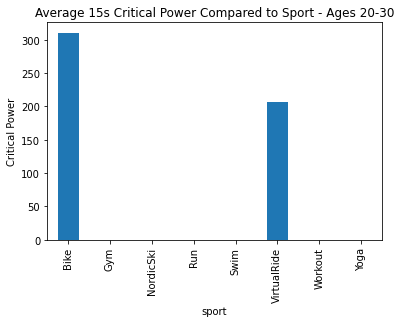

In [29]:
graph1.plot(kind = 'bar', y = 'Sport', x = 'Critical Power')
ax = plt.gca()
plt.title('Average 15s Critical Power Compared to Sport - Ages 20-30')
ax.set_ylabel('Critical Power')
plt.show()

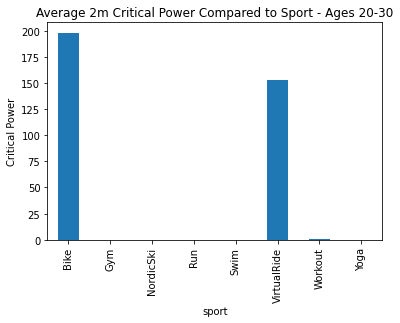

In [35]:
graph2.plot(kind = 'bar', y = 'Sport', x = '2m Critical Power')
ax = plt.gca()
plt.title('Average 2m Critical Power Compared to Sport - Ages 20-30')
ax.set_ylabel('Critical Power')
plt.show()

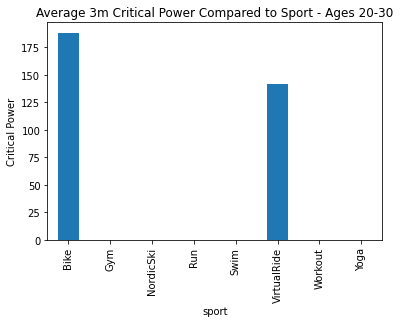

In [36]:
graph3.plot(kind = 'bar', y = 'Sport', x = '3m Critical Power')
ax = plt.gca()
plt.title('Average 3m Critical Power Compared to Sport - Ages 20-30')
ax.set_ylabel('Critical Power')
plt.show()

##Findings

For women aged 20-30, biking outdoors leads to more continuous critical power exertion than on a stationary bike.